In [1]:
import pandas as pd

# Load your music dataset with the correct file path
# Using raw string to handle Windows paths properly
df = pd.read_csv(r"A:\Karmonic Projects\Karmonic-spotify-project\karmonic dj insight\karmonic-dj-insight-bot\data\spotify_dataset.csv")

# Show the first few rows (songs)
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [2]:
# Pick the first song (row 0)
track = df.iloc[0]

# Create a dictionary of the features GPT needs
track_features = {
    "valence": track["valence"],
    "energy": track["energy"],
    "danceability": track["danceability"],
    "tempo": track["tempo"],
    "acousticness": track["acousticness"],
    "instrumentalness": track["instrumentalness"]
}

track_features


{'valence': np.float64(0.814),
 'energy': np.float64(0.91),
 'danceability': np.float64(0.389),
 'tempo': np.float64(166.969),
 'acousticness': np.float64(0.611),
 'instrumentalness': np.float64(0.0)}

### Karmonic is holding a song 🎼🧠

In [13]:
!pip install cohere

In [14]:
import cohere
from dotenv import load_dotenv
import os
import sys
sys.path.append('../app')

from prompts import mood_summary_prompt

# Load your .env key
load_dotenv()
api_key = os.getenv("COHERE_API_KEY")

# Create Cohere client
co = cohere.Client(api_key)

# Build the prompt using your track features
prompt = mood_summary_prompt(track_features)

# Send prompt to Cohere
response = co.generate(
    model="command-r-plus",  # or "command-r" if needed
    prompt=prompt,
    max_tokens=300,
    temperature=0.7
)

# Print GPT-style response
print("🎧 Mood Summary:\n")
print(response.generations[0].text.strip())


🎧 Mood Summary:

Pulsing with vibrant energy, this track evokes a mood of exhilarating freedom. The high valence and energy create a sense of euphoria, as if the music is bursting with life and light. The low danceability and tempo hint at a rebellious, unconventional spirit, encouraging individual expression and a break from the predictable rhythm of everyday life. 

This song feels like a rebellious celebration, a defiant yet joyous shout into the night. It captures the essence of youthful abandon, of throwing caution to the wind and embracing the thrilling unknown. The fast tempo and energetic vibe create a sense of urgency, as if this moment of liberation is fleeting and must be seized with passionate intensity. 

Imagine a wild, carefree dance under the stars, a moment of collective euphoria where inhibitions melt away. This track is the heartbeat of that celebration, an anthem for the adventurous spirit, urging you to embrace life with open arms and a fearless heart.


### Karmonic just got Cohere-powered 🤖🎧

In [15]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


[Text(0, 0.2, ''),
 Text(0, 0.4, ''),
 Text(0, 0.6000000000000001, ''),
 Text(0, 0.8, ''),
 Text(0, 1.0, '')]

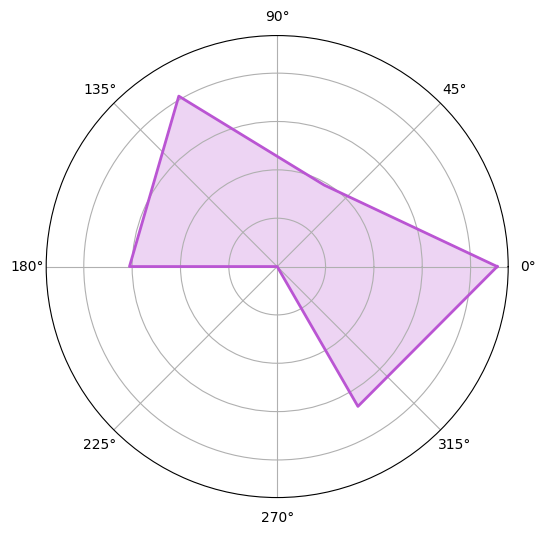

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Use your existing track_features dictionary
features = {
    "Energy": track_features["energy"],
    "Danceability": track_features["danceability"],
    "Valence": track_features["valence"],
    "Acousticness": track_features["acousticness"],
    "Instrumentalness": track_features["instrumentalness"],
    "Tempo (scaled)": track_features["tempo"] / 250  # scale to 0–1
}

# Prep labels and values
labels = list(features.keys())
values = list(features.values())

# Radar needs a circular loop
values += values[:1]  # Repeat first value at the end
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# Plot setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid', color='mediumorchid')
ax.fill(angles, values, alpha=0.25, color='mediumorchid')
ax.set_yticklabels([])  # This removes the radial labels
# If you wanted to set custom labels instead, use: ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])

### Karmonic can see the music now 👁️🎶